## Gradient Descent Algorithm

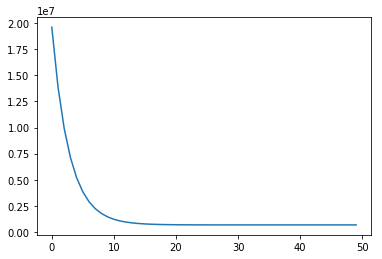

664886.412433052


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def error(x1, x2, x3, x4, x5, y, theta):
    
    total_error = 0
    
    for i in range (len(x1)):
        total_error += (theta[5] * x5[i] + theta[4] * x4[i] + theta[3] * x3[i] + theta[2] * x2[i] + theta[1] * x1[i] + theta[0] - y[i])**2

    return total_error
        
        
def cal_gradient(x1, x2, x3, x4, x5, y, theta):
    
    grad = np.zeros((6,))

    for i in range(len(y)):
        
        grad[0] += (theta[5] * x5[i] + theta[4] * x4[i] + theta[3] * x3[i] + theta[2] * x2[i] + theta[1] * x1[i] + theta[0] - y[i])
        grad[1] += (theta[5] * x5[i] + theta[4] * x4[i] + theta[3] * x3[i] + theta[2] * x2[i] + theta[1] * x1[i] + theta[0] - y[i]) * x1[i]
        grad[2] += (theta[5] * x5[i] + theta[4] * x4[i] + theta[3] * x3[i] + theta[2] * x2[i] + theta[1] * x1[i] + theta[0] - y[i]) * x2[i]
        grad[3] += (theta[5] * x5[i] + theta[4] * x4[i] + theta[3] * x3[i] + theta[2] * x2[i] + theta[1] * x1[i] + theta[0] - y[i]) * x3[i]
        grad[4] += (theta[5] * x5[i] + theta[4] * x4[i] + theta[3] * x3[i] + theta[2] * x2[i] + theta[1] * x1[i] + theta[0] - y[i]) * x4[i]
        grad[5] += (theta[5] * x5[i] + theta[4] * x4[i] + theta[3] * x3[i] + theta[2] * x2[i] + theta[1] * x1[i] + theta[0] - y[i]) * x5[i]
    
    return grad


def gradientDescent(x1, x2, x3, x4, x5, y):
    
    iterations = 50
    error_list = []
    theta_list = []
    theta = np.array([0, 0, 0, 0, 0, 0])
    
    while iterations > 0:
        
        total_error = error(x1, x2, x3, x4, x5, y, theta)
        error_list.append(total_error)
        grad = cal_gradient(x1, x2, x3, x4, x5, y, theta)
        
        theta = theta - 0.0001 * grad
        theta_list.append(theta)
        
        iterations -=1
    
    return theta, error_list, theta_list
  

f = pd.read_csv('Train.csv')

x1 = f["feature_1"]
x2 = f["feature_2"]
x3 = f["feature_3"]
x4 = f["feature_4"]
x5 = f["feature_5"]

y = f["target"]

x1 = x1.values.reshape((-1,))
x2 = x2.values.reshape((-1,))
x3 = x3.values.reshape((-1,))
x4 = x4.values.reshape((-1,))
x5 = x5.values.reshape((-1,))

y = y.values.reshape((-1,))

theta, error_list, theta_list = gradientDescent(x1, x2, x3, x4, x5, y)

theta_list = np.array(theta_list)

plt.plot(error_list)
plt.show()

print(error_list[-1])


## Stochastic Gradient Descent

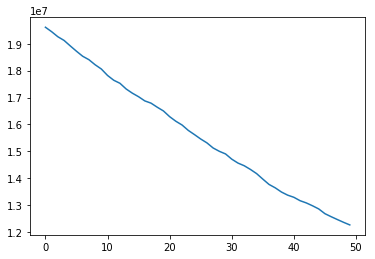

12267465.38386001


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def error(x1, x2, x3, x4, x5, y, theta):
    
    total_error = 0
    
    for i in range (len(x1)):
        total_error += (theta[5] * x5[i] + theta[4] * x4[i] + theta[3] * x3[i] + theta[2] * x2[i] + theta[1] * x1[i] + theta[0] - y[i])**2

    return total_error
        
        
def cal_gradient(x1, x2, x3, x4, x5, y, theta):
    
    grad = np.zeros((6,))
    indices = np.arange(y.shape[0])
    np.random.shuffle(indices)
    indices = indices[:50]

    for i in indices:
        
        grad[0] += (theta[5] * x5[i] + theta[4] * x4[i] + theta[3] * x3[i] + theta[2] * x2[i] + theta[1] * x1[i] + theta[0] - y[i])
        grad[1] += (theta[5] * x5[i] + theta[4] * x4[i] + theta[3] * x3[i] + theta[2] * x2[i] + theta[1] * x1[i] + theta[0] - y[i]) * x1[i]
        grad[2] += (theta[5] * x5[i] + theta[4] * x4[i] + theta[3] * x3[i] + theta[2] * x2[i] + theta[1] * x1[i] + theta[0] - y[i]) * x2[i]
        grad[3] += (theta[5] * x5[i] + theta[4] * x4[i] + theta[3] * x3[i] + theta[2] * x2[i] + theta[1] * x1[i] + theta[0] - y[i]) * x3[i]
        grad[4] += (theta[5] * x5[i] + theta[4] * x4[i] + theta[3] * x3[i] + theta[2] * x2[i] + theta[1] * x1[i] + theta[0] - y[i]) * x4[i]
        grad[5] += (theta[5] * x5[i] + theta[4] * x4[i] + theta[3] * x3[i] + theta[2] * x2[i] + theta[1] * x1[i] + theta[0] - y[i]) * x5[i]
    
    return grad


def gradientDescent(x1, x2, x3, x4, x5, y):
    
    iterations = 50
    error_list = []
    theta_list = []
    theta = np.array([0, 0, 0, 0, 0, 0])
    
    while iterations > 0:
        
        total_error = error(x1, x2, x3, x4, x5, y, theta)
        error_list.append(total_error)
        grad = cal_gradient(x1, x2, x3, x4, x5, y, theta)
        
        theta = theta - 0.0001 * grad
        theta_list.append(theta)
        
        iterations -=1
    
    return theta, error_list, theta_list 


f = pd.read_csv('Train.csv')

x1 = f["feature_1"]
x2 = f["feature_2"]
x3 = f["feature_3"]
x4 = f["feature_4"]
x5 = f["feature_5"]

y = f["target"]

x1 = x1.values.reshape((-1,))
x2 = x2.values.reshape((-1,))
x3 = x3.values.reshape((-1,))
x4 = x4.values.reshape((-1,))
x5 = x5.values.reshape((-1,))

y = y.values.reshape((-1,))

theta, error_list, theta_list = gradientDescent(x1, x2, x3, x4, x5, y)

theta_list = np.array(theta_list)

plt.plot(error_list)
plt.show()

print(error_list[-1])